In [3]:
#/Users/apple/Downloads/data

#   I implemented major part of this model and fine tuned keras VGG16 CNN and added some dense layers 
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')

!pip3 install numpy 
!pip3 install cv2
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install argparse
!pip3 install imutils
!pip3 install sklearn
!pip3 install keras
!pip3 install tensorflow
# importing libraries

import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should co

In [4]:
!pip3 install imutils
import cv2
import os
import cv2
import os
import glob
import argparse
from imutils import paths

# loading dataset
dataset='Users/apple/Downloads/Data'
INIT_LR = 1e-3
EPOCHS = 10
BS = 8
labels=['coivd','normal']

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=15,
        fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/Users/apple/Downloads/dataset/train',
        target_size=(224, 224),
        batch_size=BS,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '/Users/apple/Downloads/dataset/test',
        target_size=(224, 224),
        batch_size=BS,
        class_mode='categorical')


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Found 186 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Normal Chest X-ray Vs Covid-19 Chest X-ray


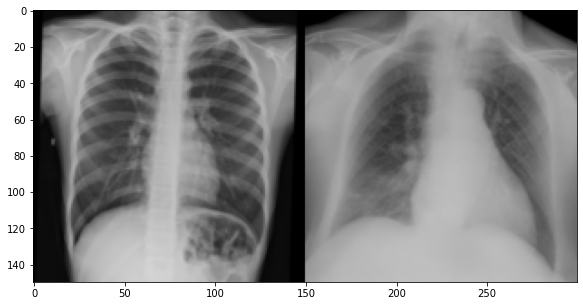

Normal Chest X-ray Vs Covid-19 Chest X-ray


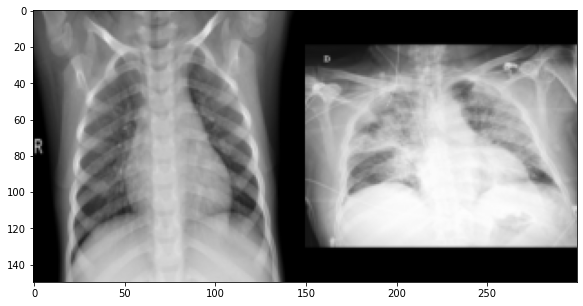

Normal Chest X-ray Vs Covid-19 Chest X-ray


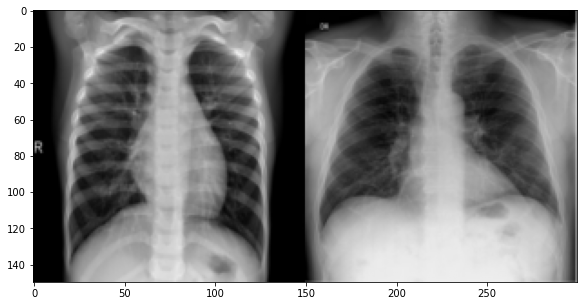

Normal Chest X-ray Vs Covid-19 Chest X-ray


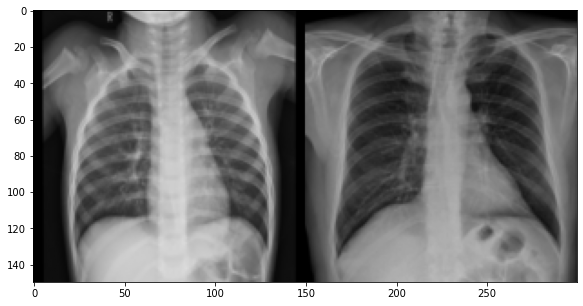

Normal Chest X-ray Vs Covid-19 Chest X-ray


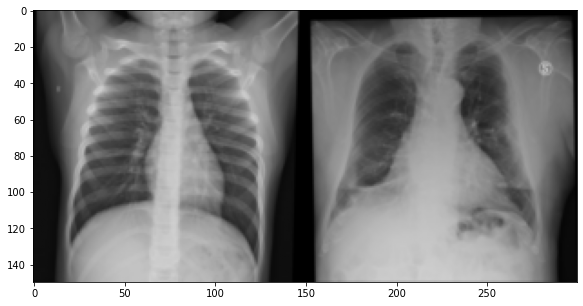

In [5]:
!pip3 install scikit-image

Cimages = os.listdir("/Users/apple/Downloads/dataset/train/covid")
Nimages = os.listdir("/Users/apple/Downloads/dataset/train/normal")
import matplotlib.pyplot as plt

import skimage
from skimage.transform import resize


# plotting function
def plotter(i):
    normal = cv2.imread("/Users/apple/Downloads/dataset/train/normal/"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread("/Users/apple/Downloads/dataset/train/covid/"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
# plotting images 
for i in range(0,5):
    plotter(i)

In [ ]:

LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)


In [ ]:
# importing VGG26 CNN from keras.application
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model

# making out own dense layers *** transfer learning ***
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False


In [ ]:
##### compiling model and training #####
from tensorflow.keras import callbacks
opt = Adam(lr=0.0001, decay=1e-5)
es = callbacks.EarlyStopping(patience=18)
chkpt = callbacks.ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=False)
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=opt)
history =model.fit_generator(training_set,steps_per_epoch=186//BS,epochs=EPOCHS,validation_data=test_set,validation_steps=94//BS,callbacks=[es,chkpt])

In [6]:
!pip3 install tensorflow 
### loading best saved model ###
import tensorflow as tf
new_model = tf.keras.models.load_model('best_model_todate')
print(new_model.predict(test_set).shape)

### Check its architecture ###
new_model.summary()


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
(92, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_____________________

In [12]:
from tensorflow.keras.preprocessing import image

# getting random image and checking results
testimg=image.load_img("/Users/apple/Downloads/dataset/test/covid/covid-19-pneumonia-20-pa-on-admission.jpg",target_size=(224, 224))
testimg=image.img_to_array(testimg)
testimg=np.expand_dims(testimg,axis=0)
testimg= testimg/255.0
result1=new_model.predict(testimg)
print(result1)

print(training_set.class_indices)

[[0.46030846 0.53969157]]
{'covid': 0, 'normal': 1}


In [10]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.jpg")
# note : plot only avaiable when training beacuse using data generator

AttributeError: 'Model' object has no attribute 'history'

<Figure size 432x288 with 0 Axes>